In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Load a different dataset (Iris in this case)
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

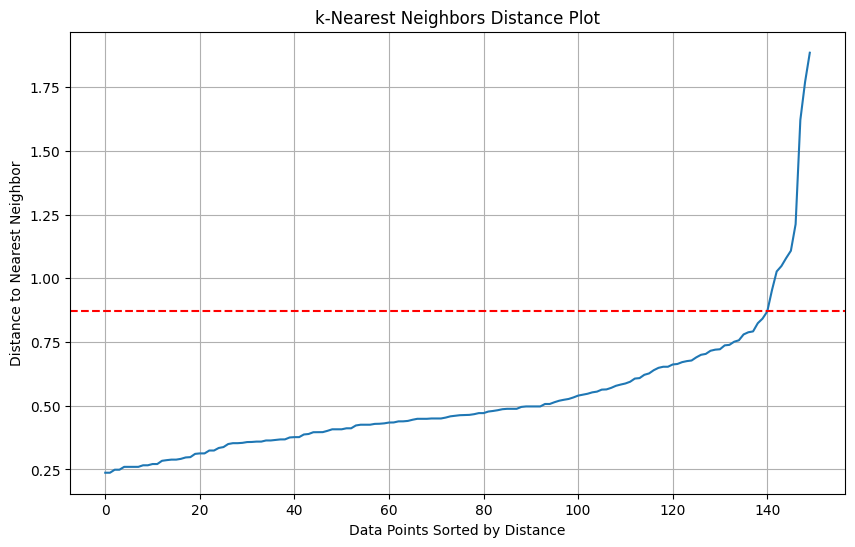

In [ ]:

# Setting min_samples and initializing NearestNeighbors
min_samples = 5  # You can adjust this value based on your analysis
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_scaled)

# Find the distances to the k nearest neighbors
distances, indices = neighbors_fit.kneighbors(df_scaled)

# Sort distances for k-nearest neighbors
distances = np.sort(distances[:, -1])  # Sort by the k-th distance (k = min_samples)

# Plot the distances to help determine eps
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-Nearest Neighbors Distance Plot')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel('Distance to Nearest Neighbor')
plt.axhline(y=.87, color='red', ls='--')
plt.grid(True)
plt.show()

## eps is crucial for DBSCAN’s performance.
If ***eps*** is too small, many points will be labeled as noise. If it’s too large, clusters may merge, and the algorithm may identify most points as a single cluster.

# k-th is the nearest neighbor (where k is usually min_samples)

In [16]:
# Now you can determine an optimal value for eps based on the "elbow" point in the plot
# Example DBSCAN model
eps_value = 0.57  # You should adjust this based on the plot
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
clusters = dbscan.fit_predict(df_scaled)

# Adding the cluster labels to the original DataFrame
df['Cluster'] = clusters

# Display the first few rows with cluster assignments
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


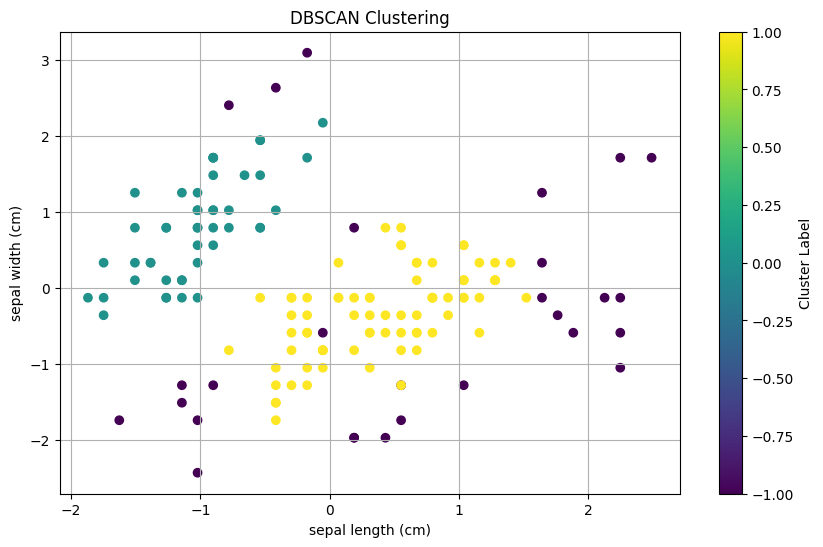

In [17]:
# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()